In [1]:
import os
import numpy as np
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.side_channel.engine_configuration_channel import EngineConfigurationChannel

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Path to executable 
env_path = os.getcwd() + '/Build/Sample.x86_64'

engine_configuration_channel = EngineConfigurationChannel()
engine_configuration_channel.set_configuration_parameters(width=500, height=500,
                                                          quality_level=0, time_scale=1)

In [3]:
env = UnityEnvironment(file_name=env_path,
                       side_channels=[engine_configuration_channel])

env.reset()

behavior_name = list(env.behavior_specs.keys())[0]

This means that some features may not work unless you upgrade the package with the lower version.Please find the versions that work best together from our release page.
https://github.com/Unity-Technologies/ml-agents/releases


In [4]:
def get_observation(b_name):
    decision_steps, _ = env.get_steps(b_name)
    for obs in decision_steps.obs:
        visual_obs = obs * 255
        visual_obs = visual_obs.astype(np.uint8)
        
    return visual_obs

In [5]:
# Extracting all the visual observations
imgs = get_observation(behavior_name)
print(imgs.shape)

(5, 84, 84, 3)


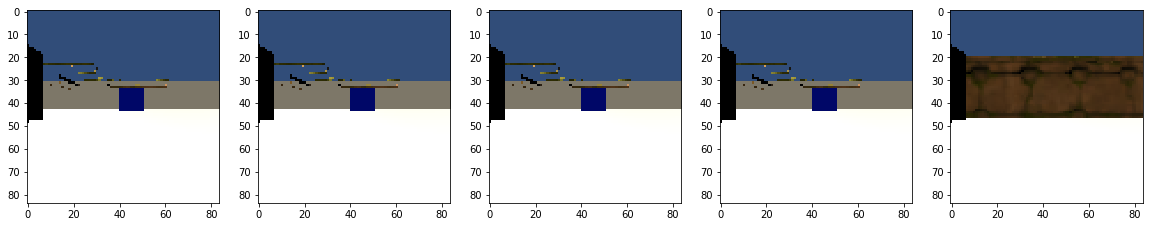

In [13]:
fig, ax = plt.subplots(1, imgs.shape[0], figsize=(20,20))
for i in range(imgs.shape[0]):
    ax[i].imshow(imgs[i]);